# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.024268e+01     8.067828e+00
 * time: 0.0023741722106933594
     1     2.798269e+01     4.394555e+00
 * time: 0.009035110473632812
     2     1.850978e+01     5.063811e+00
 * time: 0.01970815658569336
     3     1.236632e+01     3.160642e+00
 * time: 0.027866125106811523
     4     1.070217e+01     1.401693e+00
 * time: 0.03837013244628906
     5     9.879876e+00     1.670230e+00
 * time: 0.04526114463806152
     6     9.354999e+00     8.936458e-01
 * time: 0.050443172454833984
     7     9.032055e+00     7.322847e-01
 * time: 0.05559420585632324
     8     8.725473e+00     6.887747e-01
 * time: 0.06056499481201172
     9     8.487368e+00     6.918240e-01
 * time: 0.0661311149597168
    10     8.270073e+00     5.976733e-01
 * time: 0.07059502601623535
    11     8.118967e+00     4.590870e-01
 * time: 0.0753622055053711
    12     8.009364e+00     4.160023e-01
 * time: 0.08013200759887695
    13     7.973617e+00     6.210488e-01
 * ti

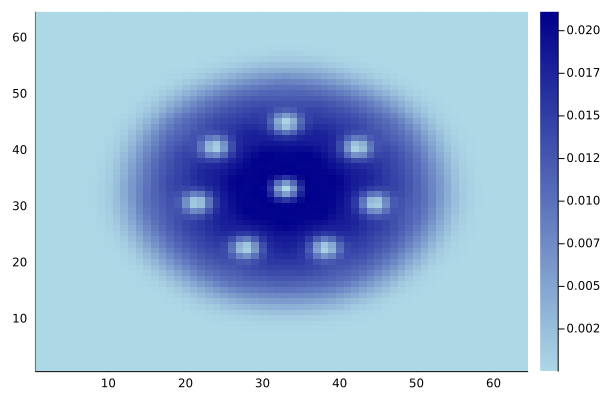

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)